# Welcome to the Lab 🥼🧪

## Market Analysis 

Let's do a deep dive on one specific market, your choice. 

Let's get into the lab and take a peak at whats going on. 

**Note** This notebook will work with any of the 70k+ markets supported by the Parcl Labs API.

As a reminder, you can get your Parcl Labs API key [here](https://dashboard.parcllabs.com/signup) to follow along. 

To run this immediately, you can use Google Colab. Remember, you must set your `PARCL_LABS_API_KEY` as a secret. See this [guide](https://medium.com/@parthdasawant/how-to-use-secrets-in-google-colab-450c38e3ec75) for more information.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ParclLabs/parcllabs-examples/blob/main/python/market_analysis.ipynb)

## Table of Contents

### [Market Overview](#market)
- Housing Stock/Mix Analysis
- Percent of Overall Market Owned by Investors
- Market Overview: Percent of all units that are rentals
- Who owns the homes? Size of investors in the market

### [Listing Overview](#listings)
- New listings analysis
- Of listings, what share do investors account for?

### [Prices Overview](#prices)
- Rental Prices
- New Listing for Sale Prices
- Purchase Prices

We will be creating charts like this: 

![Chart1](assets/purchase_price_vs_list_price.png)
![Chart2](assets/rental_listing_price.png)
![Chart3](assets/single_family_homes_percentage.png)

In [ ]:
# Environment setup
import os
import sys
import subprocess
from datetime import datetime

# Collab setup from one click above
if "google.colab" in sys.modules:
    from google.colab import userdata
    %pip install parcllabs plotly kaleido
    api_key = userdata.get('PARCL_LABS_API_KEY')
else:
    api_key = os.getenv('PARCL_LABS_API_KEY')

In [ ]:
import parcllabs
import pandas as pd
import plotly.express as px
from parcllabs import ParclLabsClient

print(f"Parcl Labs Version: {parcllabs.__version__}")

In [2]:
client = ParclLabsClient(api_key=api_key)

In [3]:
# lets find cape coral metro, Las Vegas, etc. (i.e. CBSA)

results = client.search_markets.retrieve(
    query='San Diego',
    location_type='CITY',
    as_dataframe=True
)

results

parcl_id country    geoid state_fips_code            name  \
0   5374167     USA  0666000              06  San Diego City   
1   5316648     USA  4865180              48  San Diego City   

  state_abbreviation              region location_type  total_population  \
0                 CA             PACIFIC          CITY           1383987   
1                 TX  WEST_SOUTH_CENTRAL          CITY              3801   

   median_income  parcl_exchange_market  pricefeed_market  \
0          98657                      0                 1   
1          46620                      0                 0   

   case_shiller_10_market  case_shiller_20_market  
0                       0                       0  
1                       0                       0

In [4]:
# we will use the cape coral parcl id of 2899822 throughout the rest of our analysis
analysis_parcl_id = results.iloc[0]['parcl_id']
name = results.iloc[0]['name']

# set default save directory
save_dir = './graphics'
new_dir_name = f"{analysis_parcl_id}-{name}-{datetime.today().date()}"
output_dir = os.path.join(save_dir, new_dir_name)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"In this analysis, we are studying: {name} which has parcl id: {analysis_parcl_id}. Saving graphics to: {save_dir}")

In this analysis, we are studying: San Diego City which has parcl id: 5374167. Saving graphics to: ./graphics


<a id='market'></a>
#### Market Overview

Let's review housing stock mix, percent of housing stock owned by investors, and percent of all units that are rentals

In [5]:
housing_stock = client.market_metrics_housing_stock.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 100
    },
    as_dataframe=True # make life easy on ourselves
)

housing_stock

date  single_family   condo  townhouse  other  all_properties  \
0   2024-03-01         216661  163945       2717  46806          430129   
1   2024-02-01         216659  163935       2716  46801          430111   
2   2024-01-01         216658  163928       2715  46798          430099   
3   2023-12-01         216652  163909       2714  46793          430068   
4   2023-11-01         216646  163886       2714  46790          430036   
..         ...            ...     ...        ...    ...             ...   
58  2019-05-01         215975  162786       2611  46676          428048   
59  2019-04-01         215968  162757       2611  46674          428010   
60  2019-03-01         215960  162742       2610  46674          427986   
61  2019-02-01         215952  162729       2609  46673          427963   
62  2019-01-01         215945  162711       2609  46670          427935   

    parcl_id  
0    5374167  
1    5374167  
2    5374167  
3    5374167  
4    5374167  
..       ...  
58   5374167  
59   5374167  
60   5374167  
61   5374167  
62   5374167  

[63 rows x 7 columns]

In [6]:
housing_stock['pct_condo'] = housing_stock['condo']/housing_stock['all_properties']
housing_stock['pct_townhouse'] = housing_stock['townhouse']/housing_stock['all_properties']

housing_stock

date  single_family   condo  townhouse  other  all_properties  \
0   2024-03-01         216661  163945       2717  46806          430129   
1   2024-02-01         216659  163935       2716  46801          430111   
2   2024-01-01         216658  163928       2715  46798          430099   
3   2023-12-01         216652  163909       2714  46793          430068   
4   2023-11-01         216646  163886       2714  46790          430036   
..         ...            ...     ...        ...    ...             ...   
58  2019-05-01         215975  162786       2611  46676          428048   
59  2019-04-01         215968  162757       2611  46674          428010   
60  2019-03-01         215960  162742       2610  46674          427986   
61  2019-02-01         215952  162729       2609  46673          427963   
62  2019-01-01         215945  162711       2609  46670          427935   

    parcl_id  pct_condo  pct_townhouse  
0    5374167   0.381153       0.006317  
1    5374167   0.381146       0.006315  
2    5374167   0.381140       0.006313  
3    5374167   0.381123       0.006311  
4    5374167   0.381098       0.006311  
..       ...        ...            ...  
58   5374167   0.380298       0.006100  
59   5374167   0.380264       0.006100  
60   5374167   0.380251       0.006098  
61   5374167   0.380241       0.006096  
62   5374167   0.380224       0.006097  

[63 rows x 9 columns]

In [7]:
# Let's analyze how the percent of single family homes as a proportion of the overall housing stock has changed
# since 2019

housing_stock['pct_single_family'] = housing_stock['single_family']/housing_stock['all_properties']

In [8]:
labs_logo_lookup = {
    'blue': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api.png',
    'white': 'https://parcllabs-assets.s3.amazonaws.com/powered-by-parcllabs-api-logo-white.png'
}

# set charting constants
labs_logo_dict = dict(
        source=labs_logo_lookup['white'],
        xref="paper",
        yref="paper",
        x=0.5,  # Centering the logo below the title
        y=1.02,  # Adjust this value to position the logo just below the title
        sizex=0.15, 
        sizey=0.15,
        xanchor="center",
        yanchor="bottom"
)

media_img_size_lookup = {
    'X': {
        'width': 1600,
        'height': 900
    }
}

PLATFORM = 'X'

# set image sizes
IMG_WIDTH = media_img_size_lookup[PLATFORM]['width']
IMG_HEIGHT = media_img_size_lookup[PLATFORM]['height']

# plotting title settings
PLOT_TITLE_SETTINGS = {
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }

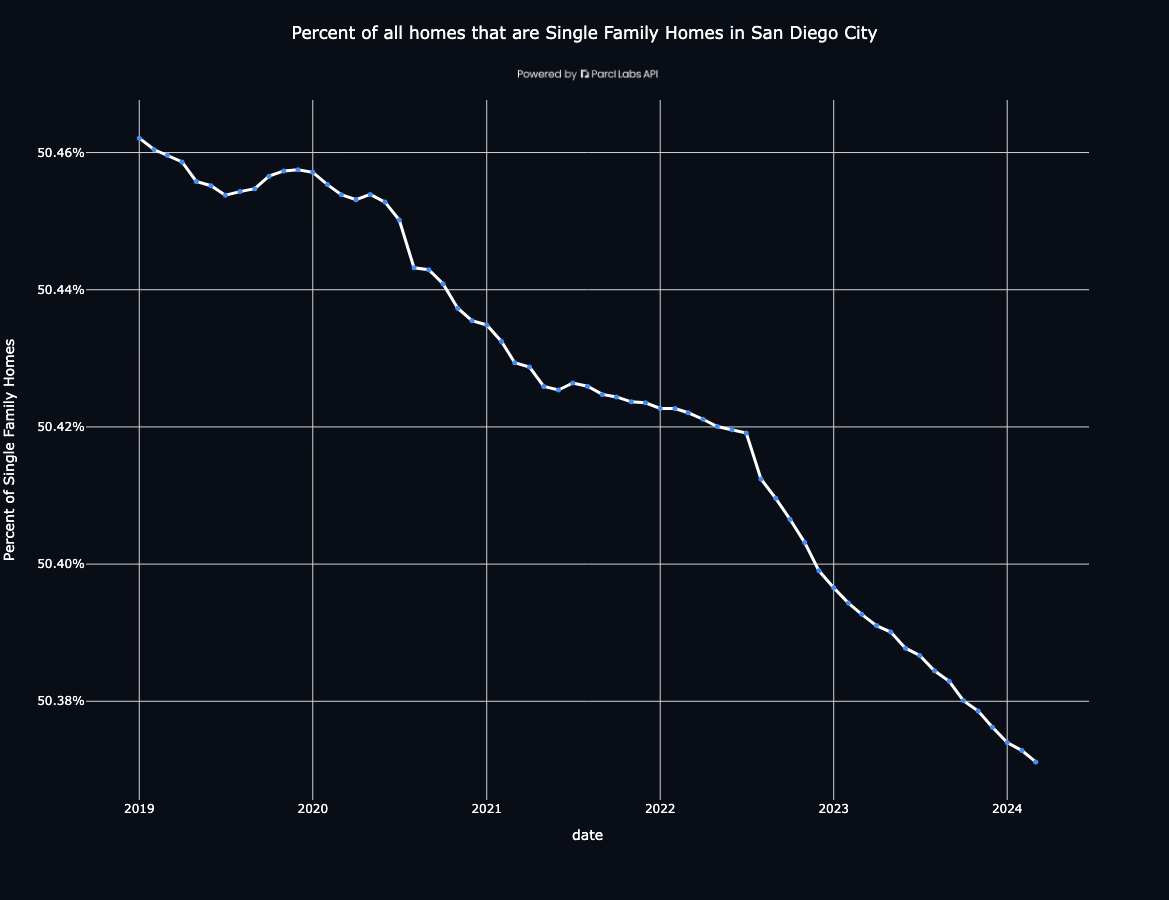

In [9]:
# Creating the line chart
fig = px.line(
    housing_stock, 
    x='date', 
    y='pct_single_family', 
    title=f'Percent of all homes that are Single Family Homes in {name}',
    labels={'pct_single_family': 'Percent of Single Family Homes'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    width=IMG_WIDTH,
    height=IMG_HEIGHT,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title=PLOT_TITLE_SETTINGS,
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".2%")

# save fig
fig.write_image(os.path.join(output_dir, 'percent_single_family_homes.png'), width=IMG_WIDTH, height=IMG_HEIGHT)
# Show the plot
fig.show()

In [10]:
# Now lets find out how much of this is owned by investors
investor_ownership = client.investor_metrics_housing_stock_ownership.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 200,
    },
    as_dataframe=True
)

# for graph formatting, divide pct_ownership by 100 since plotly handles this internally
investor_ownership['pct_ownership'] = investor_ownership['pct_ownership']/100

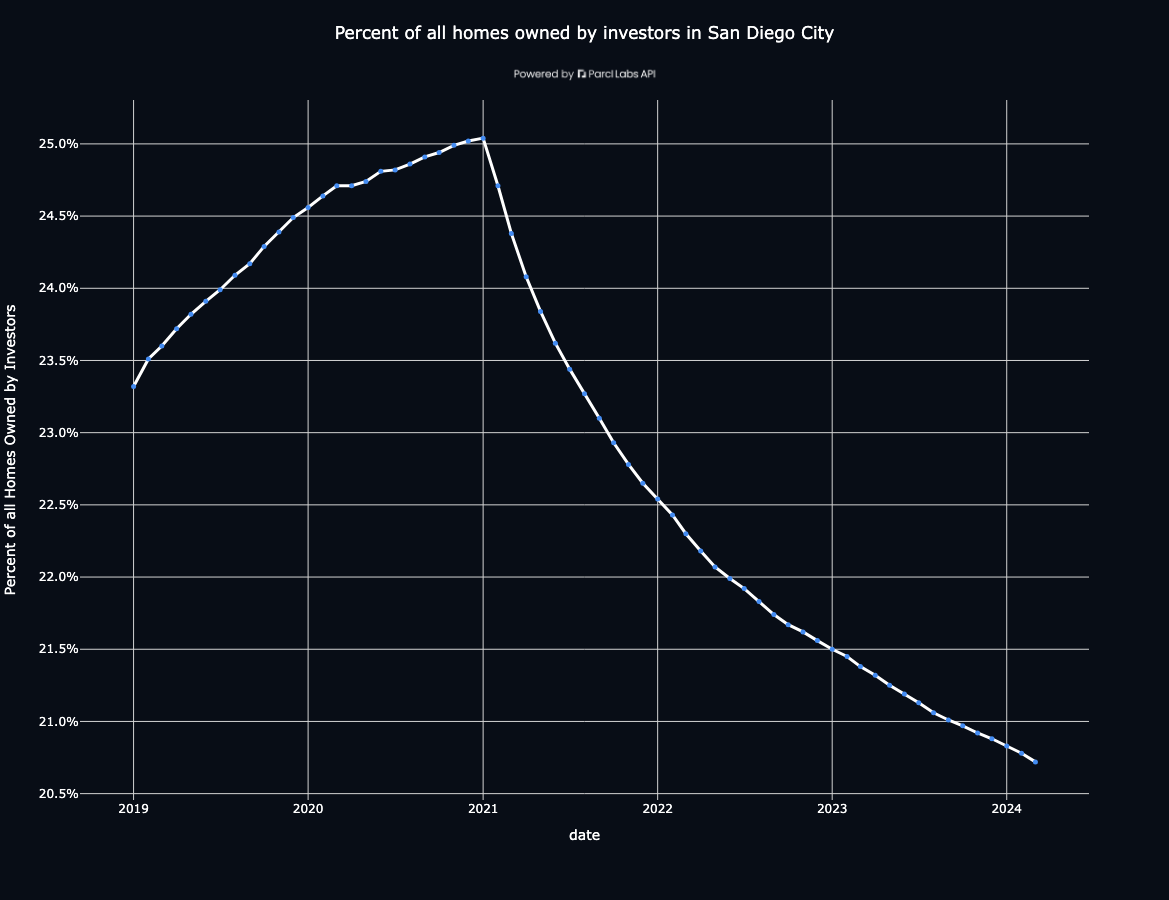

In [11]:
# Creating the line chart
fig = px.line(
    investor_ownership, 
    x='date', 
    y='pct_ownership', 
    title=f'Percent of all homes owned by investors in {name}',
    labels={'pct_ownership': 'Percent of all Homes Owned by Investors'}
)

# Showing the plot
# Add the logo as a layout_image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=IMG_HEIGHT,
    width=IMG_WIDTH,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title=PLOT_TITLE_SETTINGS,
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(tickformat=".1%")

# save
fig.write_image(os.path.join(output_dir, 'percent_all_homes_owned_by_investors.png'), width=IMG_WIDTH, height=IMG_HEIGHT)

# Show the plot
fig.show()

In [12]:
# How big are the investors? Let's find out
portfolio_size_ownership = client.portfolio_metrics_sf_housing_stock_ownership.retrieve(
    parcl_id=analysis_parcl_id,
    as_dataframe=True
)

portfolio_size_ownership

date  count_portfolio_2_to_9  count_portfolio_10_to_99  \
0  2024-03-01                   22783                       755   

   count_portfolio_100_to_999  count_portfolio_1000_plus  \
0                          11                        115   

   count_all_portfolios  pct_sf_housing_stock_portfolio_2_to_9  \
0                 23664                                  10.52   

   pct_sf_housing_stock_portfolio_10_to_99  \
0                                     0.35   

   pct_sf_housing_stock_portfolio_100_to_999  \
0                                       0.01   

   pct_sf_housing_stock_portfolio_1000_plus  \
0                                      0.05   

   pct_sf_housing_stock_all_portfolios  parcl_id  
0                                10.92   5374167

In [13]:
# lets focus on the percentages
pso_pcts = portfolio_size_ownership[[
    'date', 
    'pct_sf_housing_stock_portfolio_2_to_9', 
    'pct_sf_housing_stock_portfolio_10_to_99', 
    'pct_sf_housing_stock_portfolio_100_to_999',
    'pct_sf_housing_stock_portfolio_1000_plus',
    'pct_sf_housing_stock_all_portfolios'
]]

pso_pcts_long = pso_pcts.melt(id_vars=['date'], var_name='category', value_name='percentage')
pso_pcts_long['percentage'] = pso_pcts_long['percentage']/100

# rename to friendly labels
friendly_labels = {
    'pct_sf_housing_stock_portfolio_2_to_9': 'Investor Portfolio (2 to 9 Units)', 
    'pct_sf_housing_stock_portfolio_10_to_99': 'Investor Portfolio (10 to 99 Units)', 
    'pct_sf_housing_stock_portfolio_100_to_999': 'Investor Portfolio (100 to 999 Units)',
    'pct_sf_housing_stock_portfolio_1000_plus': 'Investor Portfolio (1000+ Units)',
    'pct_sf_housing_stock_all_portfolios': 'Investor Portfolio (All Sizes)'
}

pso_pcts_long['category'] = pso_pcts_long['category'].replace(friendly_labels)
pso_pcts_long

date                               category  percentage
0  2024-03-01      Investor Portfolio (2 to 9 Units)      0.1052
1  2024-03-01    Investor Portfolio (10 to 99 Units)      0.0035
2  2024-03-01  Investor Portfolio (100 to 999 Units)      0.0001
3  2024-03-01       Investor Portfolio (1000+ Units)      0.0005
4  2024-03-01         Investor Portfolio (All Sizes)      0.1092

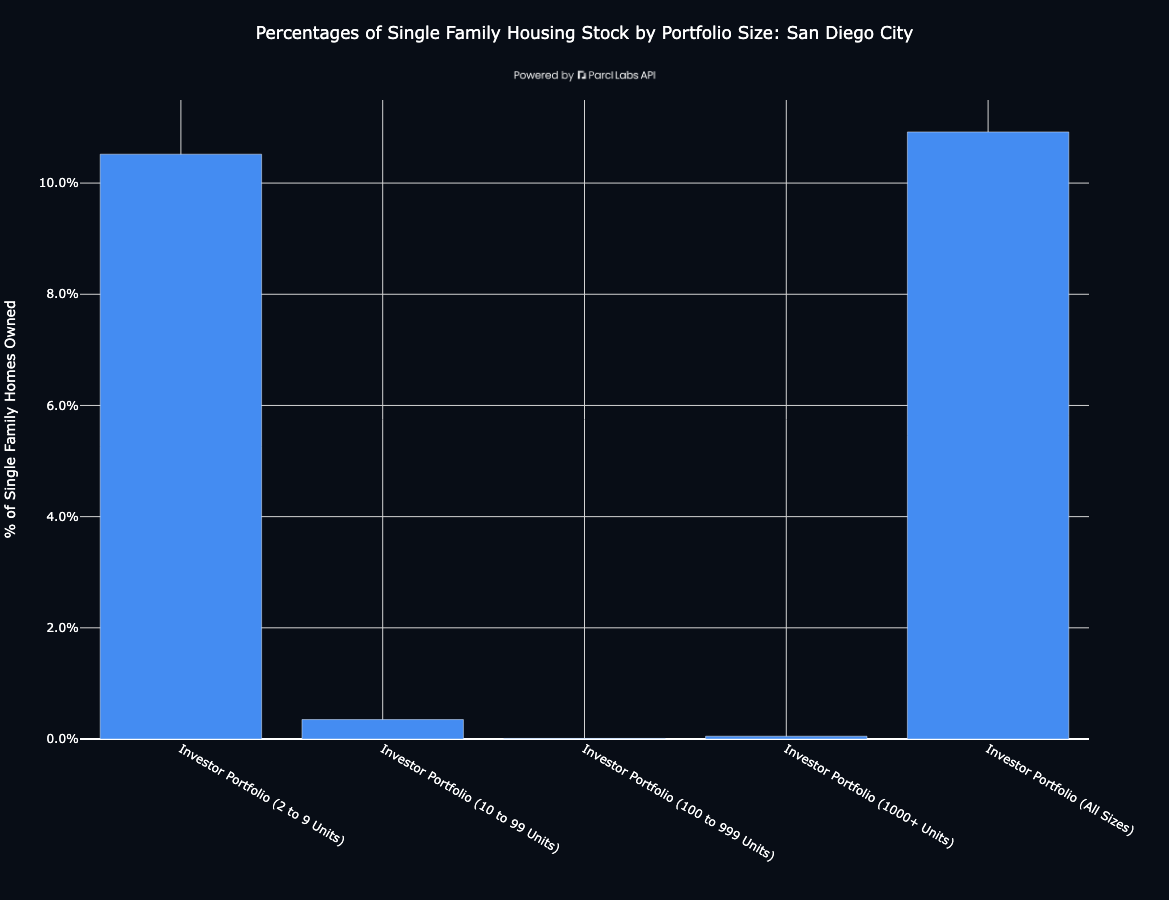

In [14]:
fig = px.bar(
    pso_pcts_long,
    x='category',
    y='percentage',
    title=f'Percentages of Single Family Housing Stock by Portfolio Size: {name}',
    labels={'percentage': '% of Single Family Homes Owned', 'category': 'Portfolio Size'},
    color_discrete_sequence=['#448CF2']  # Sets the color of the bars
)

# Adding layout image
fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=IMG_HEIGHT,
    width=IMG_WIDTH,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)' 
    ),
    title=PLOT_TITLE_SETTINGS,
    plot_bgcolor='#080D16', 
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
)

# Removing x-axis title as requested in previous query
fig.update_layout(xaxis_title="")
fig.update_yaxes(tickformat=".1%") 

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# save image
fig.write_image(os.path.join(output_dir, 'portfolio_sfh_size_breakout.png'), width=IMG_WIDTH, height=IMG_HEIGHT)

# Show the plot
fig.show()

<a id='listings'></a>
#### New Listings Analysis
Capture the change in new listings on a 7, 30, 60 and 90 day basis

In [15]:
# first order of business, lets see how new listings have changed over the last year
start_date = '2023-01-01'

new_listings = client.for_sale_market_metrics_new_listings_rolling_counts.retrieve(
    parcl_id=analysis_parcl_id,
    start_date=start_date,
    as_dataframe=True,
    params={
        'limit': 300
    }
)
new_listings.tail()

date  rolling_7_day  rolling_30_day  rolling_60_day  rolling_90_day  \
65  2023-01-30            334            1315            2199            3443   
66  2023-01-23            334            1107            2055            3458   
67  2023-01-16            289             915            2037            3533   
68  2023-01-09            319             824            2051            3641   
69  2023-01-02            156             768            2055            3723   

    parcl_id  
65   5374167  
66   5374167  
67   5374167  
68   5374167  
69   5374167

In [16]:
new_listings_long = pd.melt(
    new_listings, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['rolling_30_day', 'rolling_60_day', 'rolling_90_day'],
    value_name='Number of New Listings',
    var_name='Rolling Window (Days)'
)

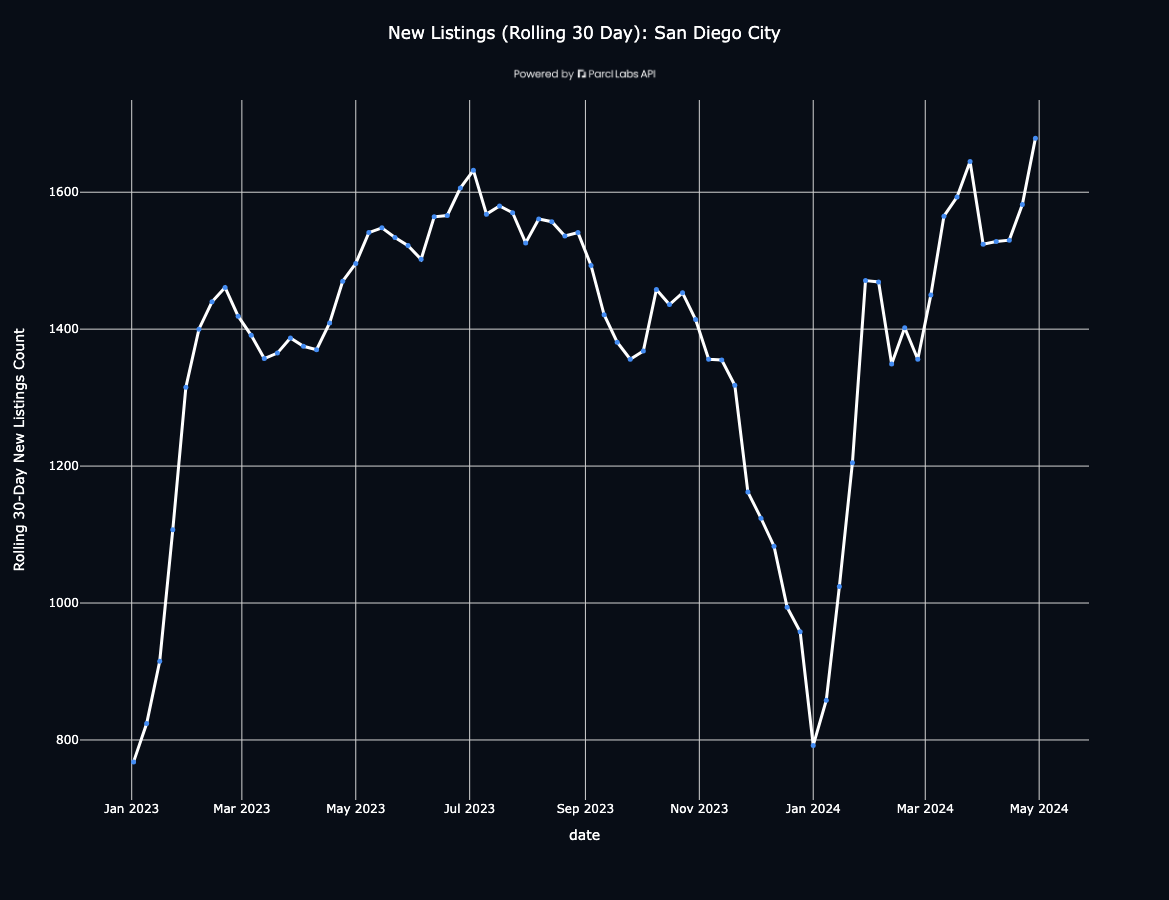

In [17]:
# Creating the line chart
fig = px.line(
    new_listings, 
    x='date', 
    y='rolling_30_day', 
    title=f'New Listings (Rolling 30 Day): {name}',
    labels={'rolling_30_day': 'Rolling 30-Day New Listings Count'}
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=IMG_HEIGHT,
    width=IMG_WIDTH,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title=PLOT_TITLE_SETTINGS,
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5) 
)


# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# save output
fig.write_image(os.path.join(output_dir, 'new_listings_rolling_30_day.png'), width=IMG_WIDTH, height=IMG_HEIGHT)

# Show the plot
fig.show()

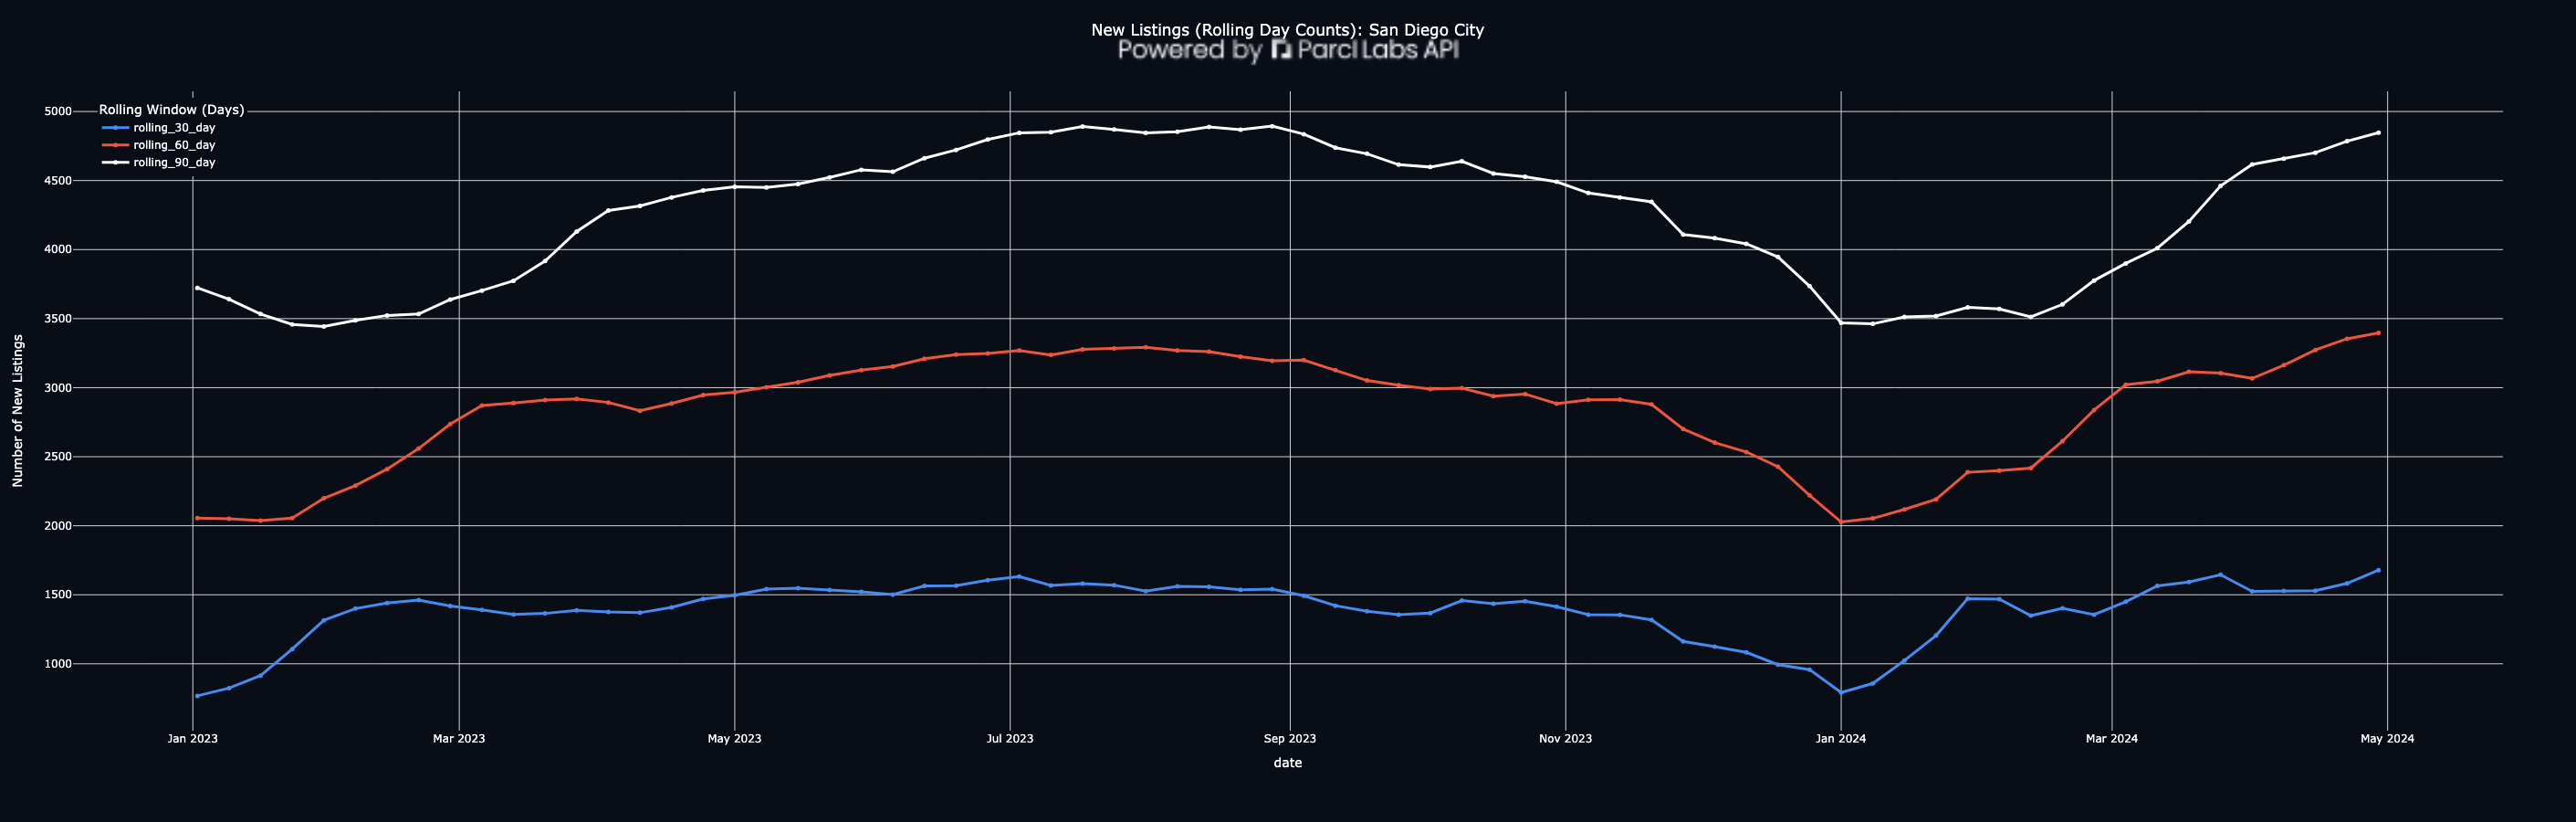

In [18]:
# Creating the line chart
fig = px.line(
    new_listings_long,
    x='date',
    y='Number of New Listings',
    color='Rolling Window (Days)',
    title=f'New Listings (Rolling Day Counts): {name}',
    labels={'count': 'Rolling Day Count'}
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    width=IMG_WIDTH,
    height=IMG_HEIGHT,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Rolling Window (Days)'
    ),
    title=PLOT_TITLE_SETTINGS,
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date'
)

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)

for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# save figure
fig.write_image(os.path.join(output_dir, 'new_listings_rolling_n_periods.png'), width=IMG_WIDTH, height=IMG_HEIGHT)


# Show the plot
fig.show()

In [19]:
# of listings on the market, what percent of them are coming from investors?

investor_listings = client.investor_metrics_new_listings_for_sale_rolling_counts.retrieve(
    parcl_id=analysis_parcl_id,
    params={
        'limit': 300
    },
    as_dataframe=True
)

investor_listings['pct_for_sale_market'] = investor_listings['pct_for_sale_market']/100
investor_listings.head(4)

date          period  counts  pct_for_sale_market  parcl_id
0  2024-04-29   rolling_7_day      92               0.2377   5374167
1  2024-04-29  rolling_30_day     417               0.2484   5374167
2  2024-04-29  rolling_60_day     836               0.2462   5374167
3  2024-04-29  rolling_90_day    1232               0.2542   5374167

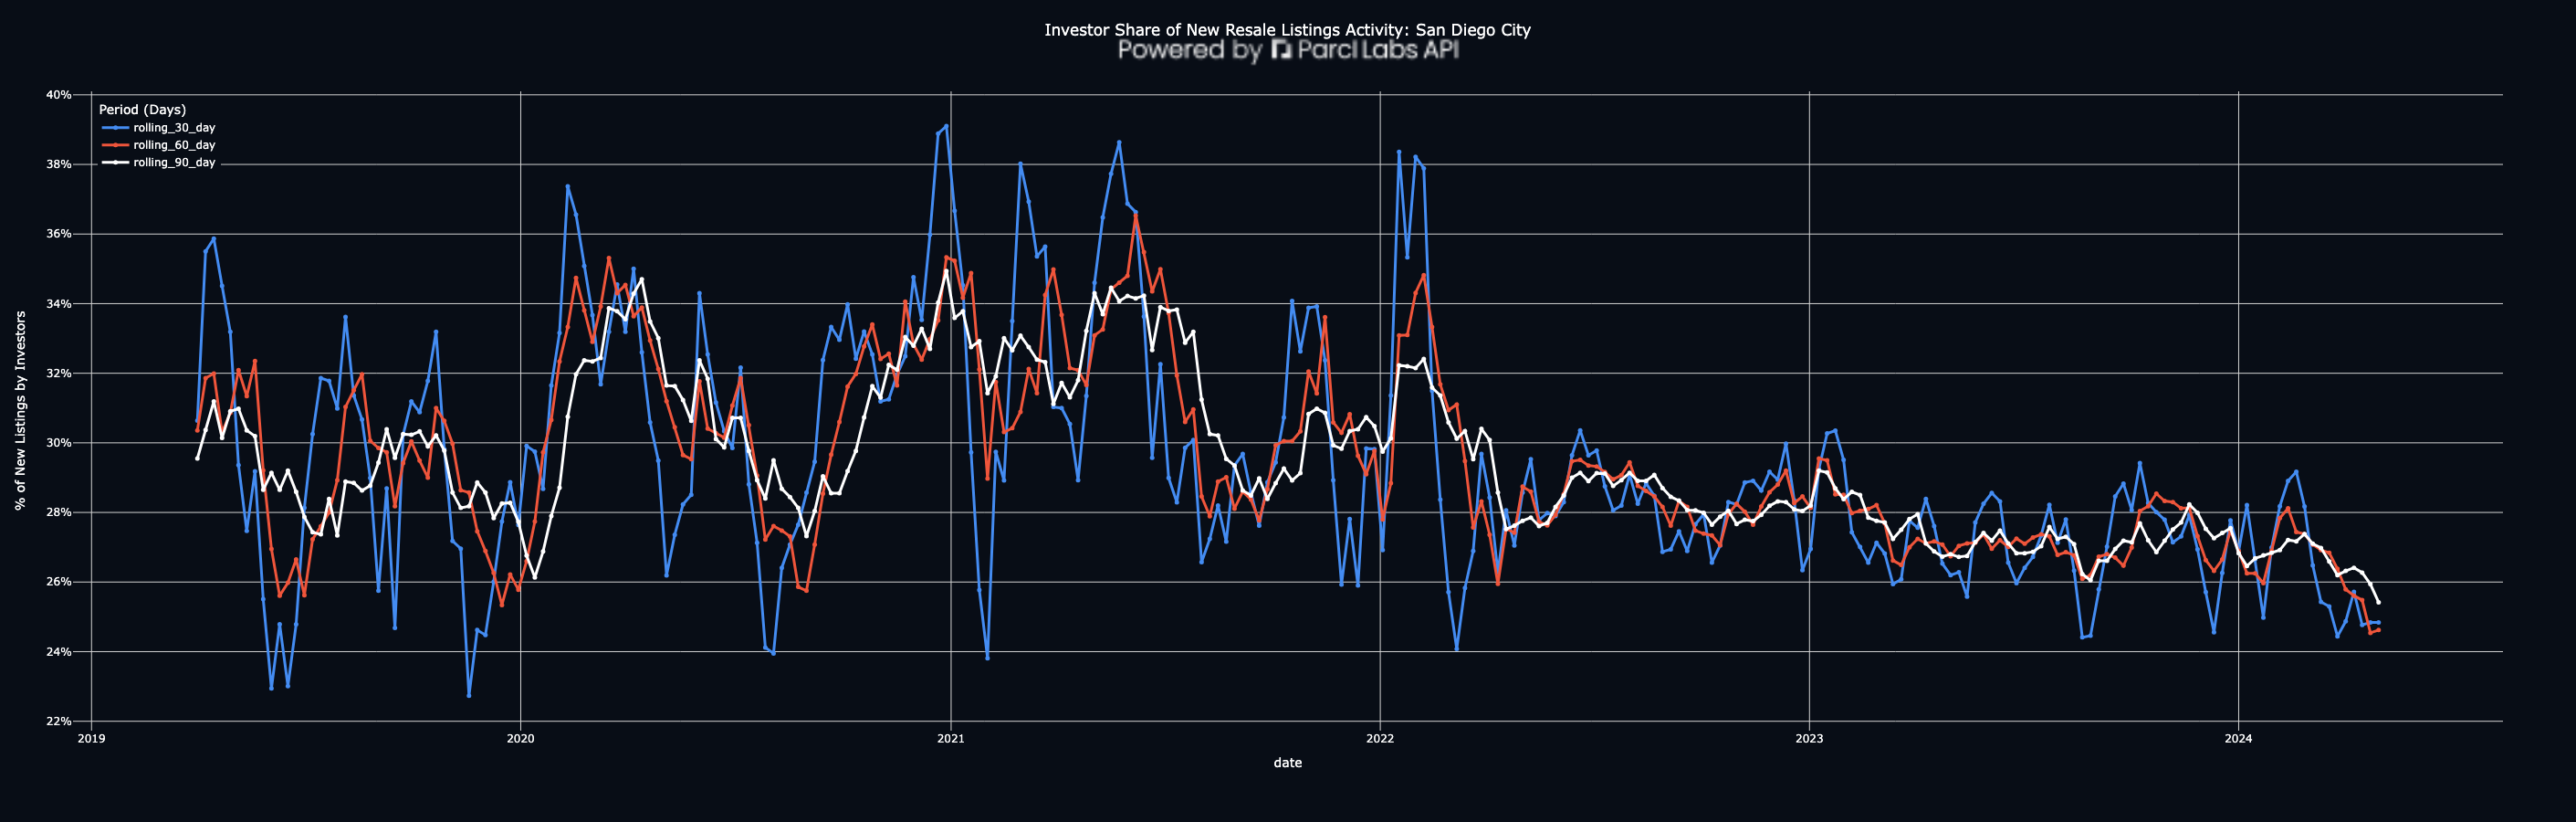

In [20]:
fig = px.line(
    investor_listings.loc[investor_listings['period'] != 'rolling_7_day'],
    x='date',
    y='pct_for_sale_market',
    color='period',  # This creates separate lines for each period
    title=f'Investor Share of New Resale Listings Activity: {name}',
    labels={'pct_for_sale_market': '% of New Listings by Investors'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=IMG_HEIGHT,
    width=IMG_WIDTH,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top',
        title='Period (Days)'
    ),
    title=PLOT_TITLE_SETTINGS,
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    xaxis_title='date' 
)

fig.update_yaxes(tickformat=".0%")

color_map = {
    'rolling_30_day': '#448CF2',
    'rolling_90_day': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)


for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# save figure
fig.write_image(os.path.join(output_dir, 'investor_share_of_resale_listings_rolling_n_period.png'), width=IMG_WIDTH, height=IMG_HEIGHT)

# Show the plot
fig.show()


In [21]:
# now lets get the listings by portfolio sizes in sf city as of this week

portfolio_metrics_new_listings_2_to_9 = client.portfolio_metrics_new_listings_for_sale_rolling_counts.retrieve(
        parcl_id=analysis_parcl_id,
        as_dataframe=True,
        portfolio_size='PORTFOLIO_2_TO_9',
    )

portfolio_metrics_new_listings_2_to_9

date          period  counts  pct_sf_for_sale_market  parcl_id  \
0  2024-04-22   rolling_7_day      29                   16.96   5374167   
1  2024-04-22  rolling_30_day     107                   14.86   5374167   
2  2024-04-22  rolling_60_day     209                   13.45   5374167   
3  2024-04-22  rolling_90_day     284                   13.44   5374167   
4  2024-04-15   rolling_7_day      25                   13.59   5374167   
5  2024-04-15  rolling_30_day     107                   14.64   5374167   
6  2024-04-15  rolling_60_day     207                   13.48   5374167   
7  2024-04-15  rolling_90_day     278                   13.72   5374167   

     portfolio_size  
0  PORTFOLIO_2_TO_9  
1  PORTFOLIO_2_TO_9  
2  PORTFOLIO_2_TO_9  
3  PORTFOLIO_2_TO_9  
4  PORTFOLIO_2_TO_9  
5  PORTFOLIO_2_TO_9  
6  PORTFOLIO_2_TO_9  
7  PORTFOLIO_2_TO_9

In [22]:
portfolio_metrics_new_listings_10_to_9 = client.portfolio_metrics_new_listings_for_sale_rolling_counts.retrieve(
        parcl_id=analysis_parcl_id,
        as_dataframe=True,
        portfolio_size='PORTFOLIO_10_TO_99',
    )

portfolio_metrics_new_listings_10_to_9

date          period  counts  pct_sf_for_sale_market  parcl_id  \
0  2024-04-22   rolling_7_day       8                    4.68   5374167   
1  2024-04-22  rolling_30_day      28                    3.89   5374167   
2  2024-04-22  rolling_60_day      53                    3.41   5374167   
3  2024-04-22  rolling_90_day      67                    3.17   5374167   
4  2024-04-15   rolling_7_day       8                    4.35   5374167   
5  2024-04-15  rolling_30_day      28                    3.83   5374167   
6  2024-04-15  rolling_60_day      53                    3.45   5374167   
7  2024-04-15  rolling_90_day      66                    3.26   5374167   

       portfolio_size  
0  PORTFOLIO_10_TO_99  
1  PORTFOLIO_10_TO_99  
2  PORTFOLIO_10_TO_99  
3  PORTFOLIO_10_TO_99  
4  PORTFOLIO_10_TO_99  
5  PORTFOLIO_10_TO_99  
6  PORTFOLIO_10_TO_99  
7  PORTFOLIO_10_TO_99

In [23]:
portfolio_metrics_new_listings_100_to_999 = client.portfolio_metrics_new_listings_for_sale_rolling_counts.retrieve(
        parcl_id=analysis_parcl_id,
        as_dataframe=True,
        portfolio_size='PORTFOLIO_1000_PLUS',
    )

portfolio_metrics_new_listings_100_to_999

date          period  counts  pct_sf_for_sale_market  parcl_id  \
0  2024-04-22   rolling_7_day     NaN                     NaN   5374167   
1  2024-04-22  rolling_30_day     1.0                    0.14   5374167   
2  2024-04-22  rolling_60_day    12.0                    0.77   5374167   
3  2024-04-22  rolling_90_day    13.0                    0.62   5374167   
4  2024-04-15   rolling_7_day     1.0                    0.54   5374167   
5  2024-04-15  rolling_30_day     2.0                    0.27   5374167   
6  2024-04-15  rolling_60_day    13.0                    0.85   5374167   
7  2024-04-15  rolling_90_day    13.0                    0.64   5374167   

        portfolio_size  
0  PORTFOLIO_1000_PLUS  
1  PORTFOLIO_1000_PLUS  
2  PORTFOLIO_1000_PLUS  
3  PORTFOLIO_1000_PLUS  
4  PORTFOLIO_1000_PLUS  
5  PORTFOLIO_1000_PLUS  
6  PORTFOLIO_1000_PLUS  
7  PORTFOLIO_1000_PLUS

<a id='prices'></a>
### Price Activity

Let's review rental prices, new listing prices and home sales prices. 

In [24]:
# Prices
prices = client.market_metrics_housing_event_prices.retrieve(
    parcl_id=analysis_parcl_id,
    as_dataframe=True,
    params={
        'limit': 300
    }
)

prices_long = prices[['date', 'parcl_id', 'price_median_sales', 'price_median_new_listings_for_sale']]

prices_long = pd.melt(
    prices_long, 
    id_vars=['date', 'parcl_id'], 
    value_vars=['price_median_sales', 'price_median_new_listings_for_sale'],
    value_name='Median Price ($)',
    var_name='Transaction Type'
)

r = {
    'price_median_sales': 'Median Sales Price',
    'price_median_new_listings_for_sale': 'Median New Listing Price'
}

prices_long['Transaction Type'] = prices_long['Transaction Type'].replace(r)

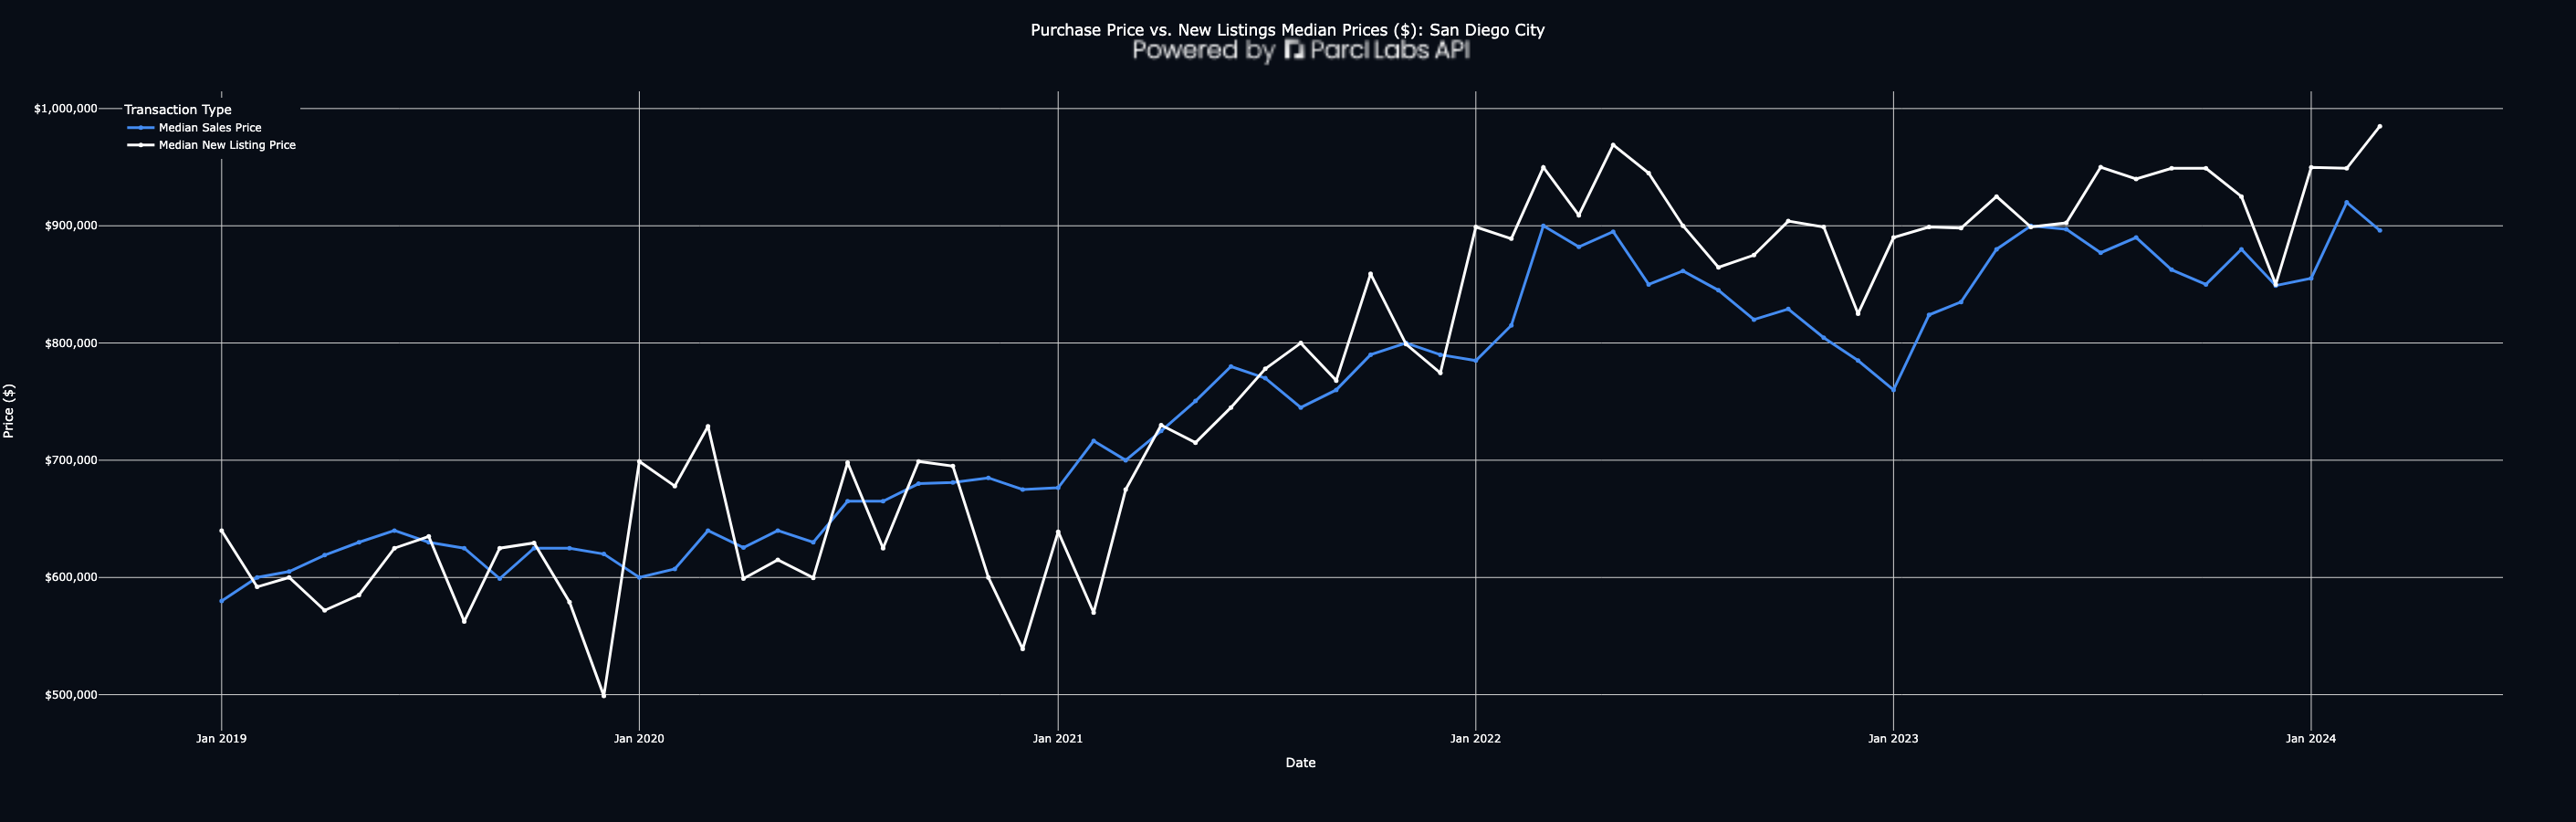

In [25]:
# Creating the line chart
fig = px.line(
    prices_long,
    x='date',
    y='Median Price ($)',
    color='Transaction Type',
    title=f'Purchase Price vs. New Listings Median Prices ($): {name}',
)

fig.add_layout_image(
    labs_logo_dict
)

fig.update_layout(
    margin=dict(b=100),
    height=IMG_HEIGHT,
    width=IMG_WIDTH,
    title=PLOT_TITLE_SETTINGS,
    xaxis_title="Date",
    yaxis_title="Price ($)",
    yaxis_tickformat='$,', 
    xaxis_tickformat='%b %Y',
    plot_bgcolor='#080D16', 
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    showlegend=True, 
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

color_map = {
    'Median Sales Price': '#448CF2',
    'Median New Listing Price': '#FFFFFF',
}

fig.update_traces(
    line=dict(width=3),
    mode='lines+markers',
    marker=dict(size=5)
)

for trace in fig.data:
    if trace.name in color_map:
        trace.line.color = color_map[trace.name]
        trace.marker.color = color_map[trace.name]

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# save figure
fig.write_image(os.path.join(output_dir, 'purchase_price_vs_new_listings_price.png'), width=IMG_WIDTH, height=IMG_HEIGHT)

# Show the plot
fig.show()

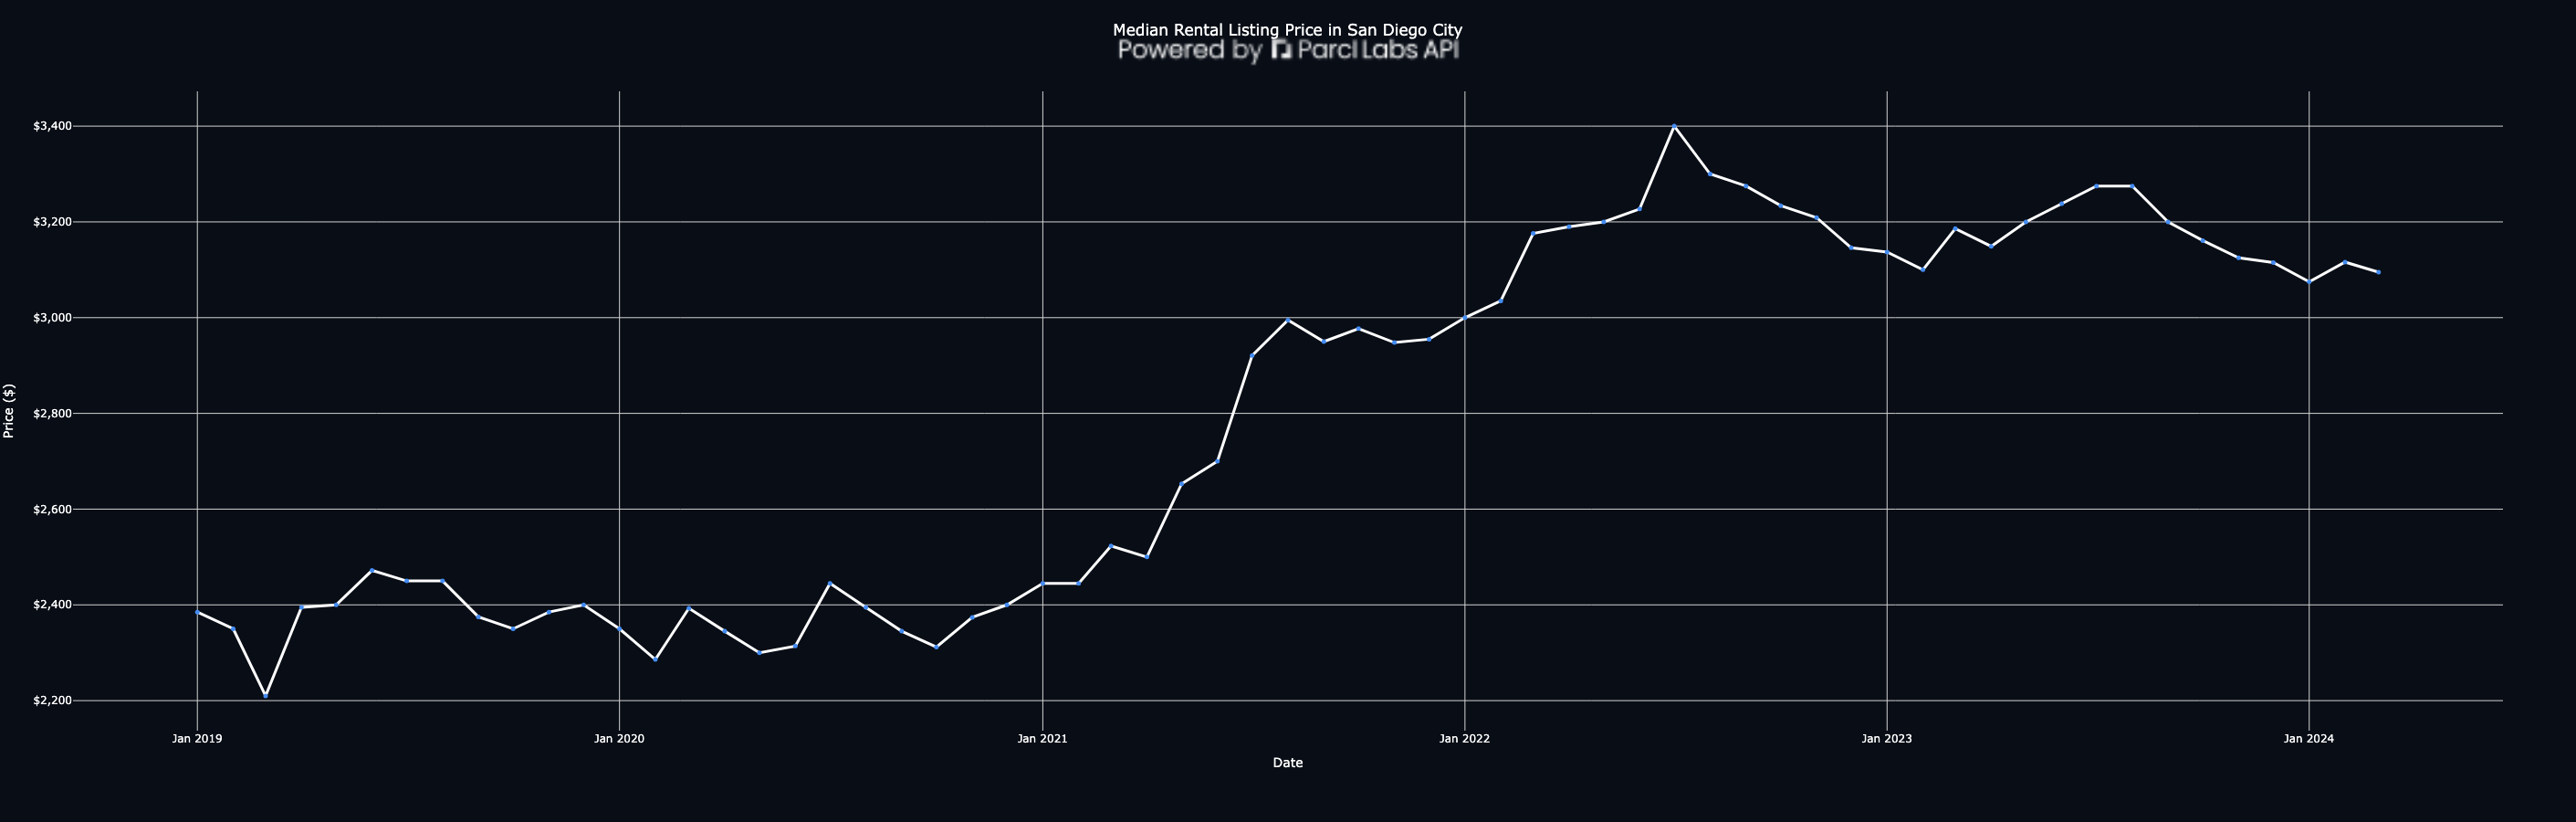

In [26]:
fig = px.line(
    prices, 
    x='date', 
    y='price_median_new_rental_listings', 
    title=f'Median Rental Listing Price in {name}',  # Add city or location in title if needed
    labels={'price_median_new_rental_listings': 'Asking Rental Price ($)'},
    line_shape='linear'  # 'spline' for smooth lines, if preferred
)

# Adding layout image
fig.add_layout_image(labs_logo_dict)

fig.update_layout(
    margin=dict(b=100),
    height=IMG_HEIGHT,
    width=IMG_WIDTH,
    title=PLOT_TITLE_SETTINGS,
    xaxis_title="Date",
    yaxis_title="Price ($)",
    yaxis_tickformat='$,',
    xaxis_tickformat='%b %Y',
    plot_bgcolor='#080D16',
    paper_bgcolor='#080D16',
    font=dict(color='#FFFFFF'),
    showlegend=True,
    legend=dict(
        x=0.01,
        y=0.99,
        traceorder="normal",
        xanchor='left',
        yanchor='top'
    ),
)

fig.update_traces(
    line=dict(color='#FFFFFF', width=3),
    mode='lines+markers',
    marker=dict(color='#448CF2', size=5)
)

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# save figure
fig.write_image(os.path.join(output_dir, 'median_rental_listings_price.png'), width=IMG_WIDTH, height=IMG_HEIGHT)

# Show the plot
fig.show()
